## LAB02 - Assignment 1: Logistic Regression using Gradient Descent

In [3]:
import pandas as pd
import numpy as np

### Loading data

In [4]:
#import dữ liệu
data = pd.read_csv('predict+students+dropout+and+academic+success.csv', sep=';')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Prepocessing data

In [5]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum(), data[col].isnull().sum())
    print(data[col].dtype)
    print('---')

Marital status
0 0
int64
---
Application mode
0 0
int64
---
Application order
0 0
int64
---
Course
0 0
int64
---
Daytime/evening attendance	
0 0
int64
---
Previous qualification
0 0
int64
---
Previous qualification (grade)
0 0
float64
---
Nacionality
0 0
int64
---
Mother's qualification
0 0
int64
---
Father's qualification
0 0
int64
---
Mother's occupation
0 0
int64
---
Father's occupation
0 0
int64
---
Admission grade
0 0
float64
---
Displaced
0 0
int64
---
Educational special needs
0 0
int64
---
Debtor
0 0
int64
---
Tuition fees up to date
0 0
int64
---
Gender
0 0
int64
---
Scholarship holder
0 0
int64
---
Age at enrollment
0 0
int64
---
International
0 0
int64
---
Curricular units 1st sem (credited)
0 0
int64
---
Curricular units 1st sem (enrolled)
0 0
int64
---
Curricular units 1st sem (evaluations)
0 0
int64
---
Curricular units 1st sem (approved)
0 0
int64
---
Curricular units 1st sem (grade)
0 0
float64
---
Curricular units 1st sem (without evaluations)
0 0
int64
---
Curricular 

In [6]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
data['Target'] = data['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)
data['Target'].unique()

array([0, 1])

In [8]:
data['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119])

In [9]:
course_unique, course_map = np.unique(data['Course'], return_inverse=True)
data['Course'] = course_map + 1
data['Course'].unique()

array([ 2, 11,  5, 15,  3, 17, 12, 10, 14, 16,  6,  8, 13,  9,  4,  1,  7])

### Feature Engineering

In [10]:
corr = data.iloc[:,:-1].corr()
print(corr.shape)

(36, 36)


<Axes: >

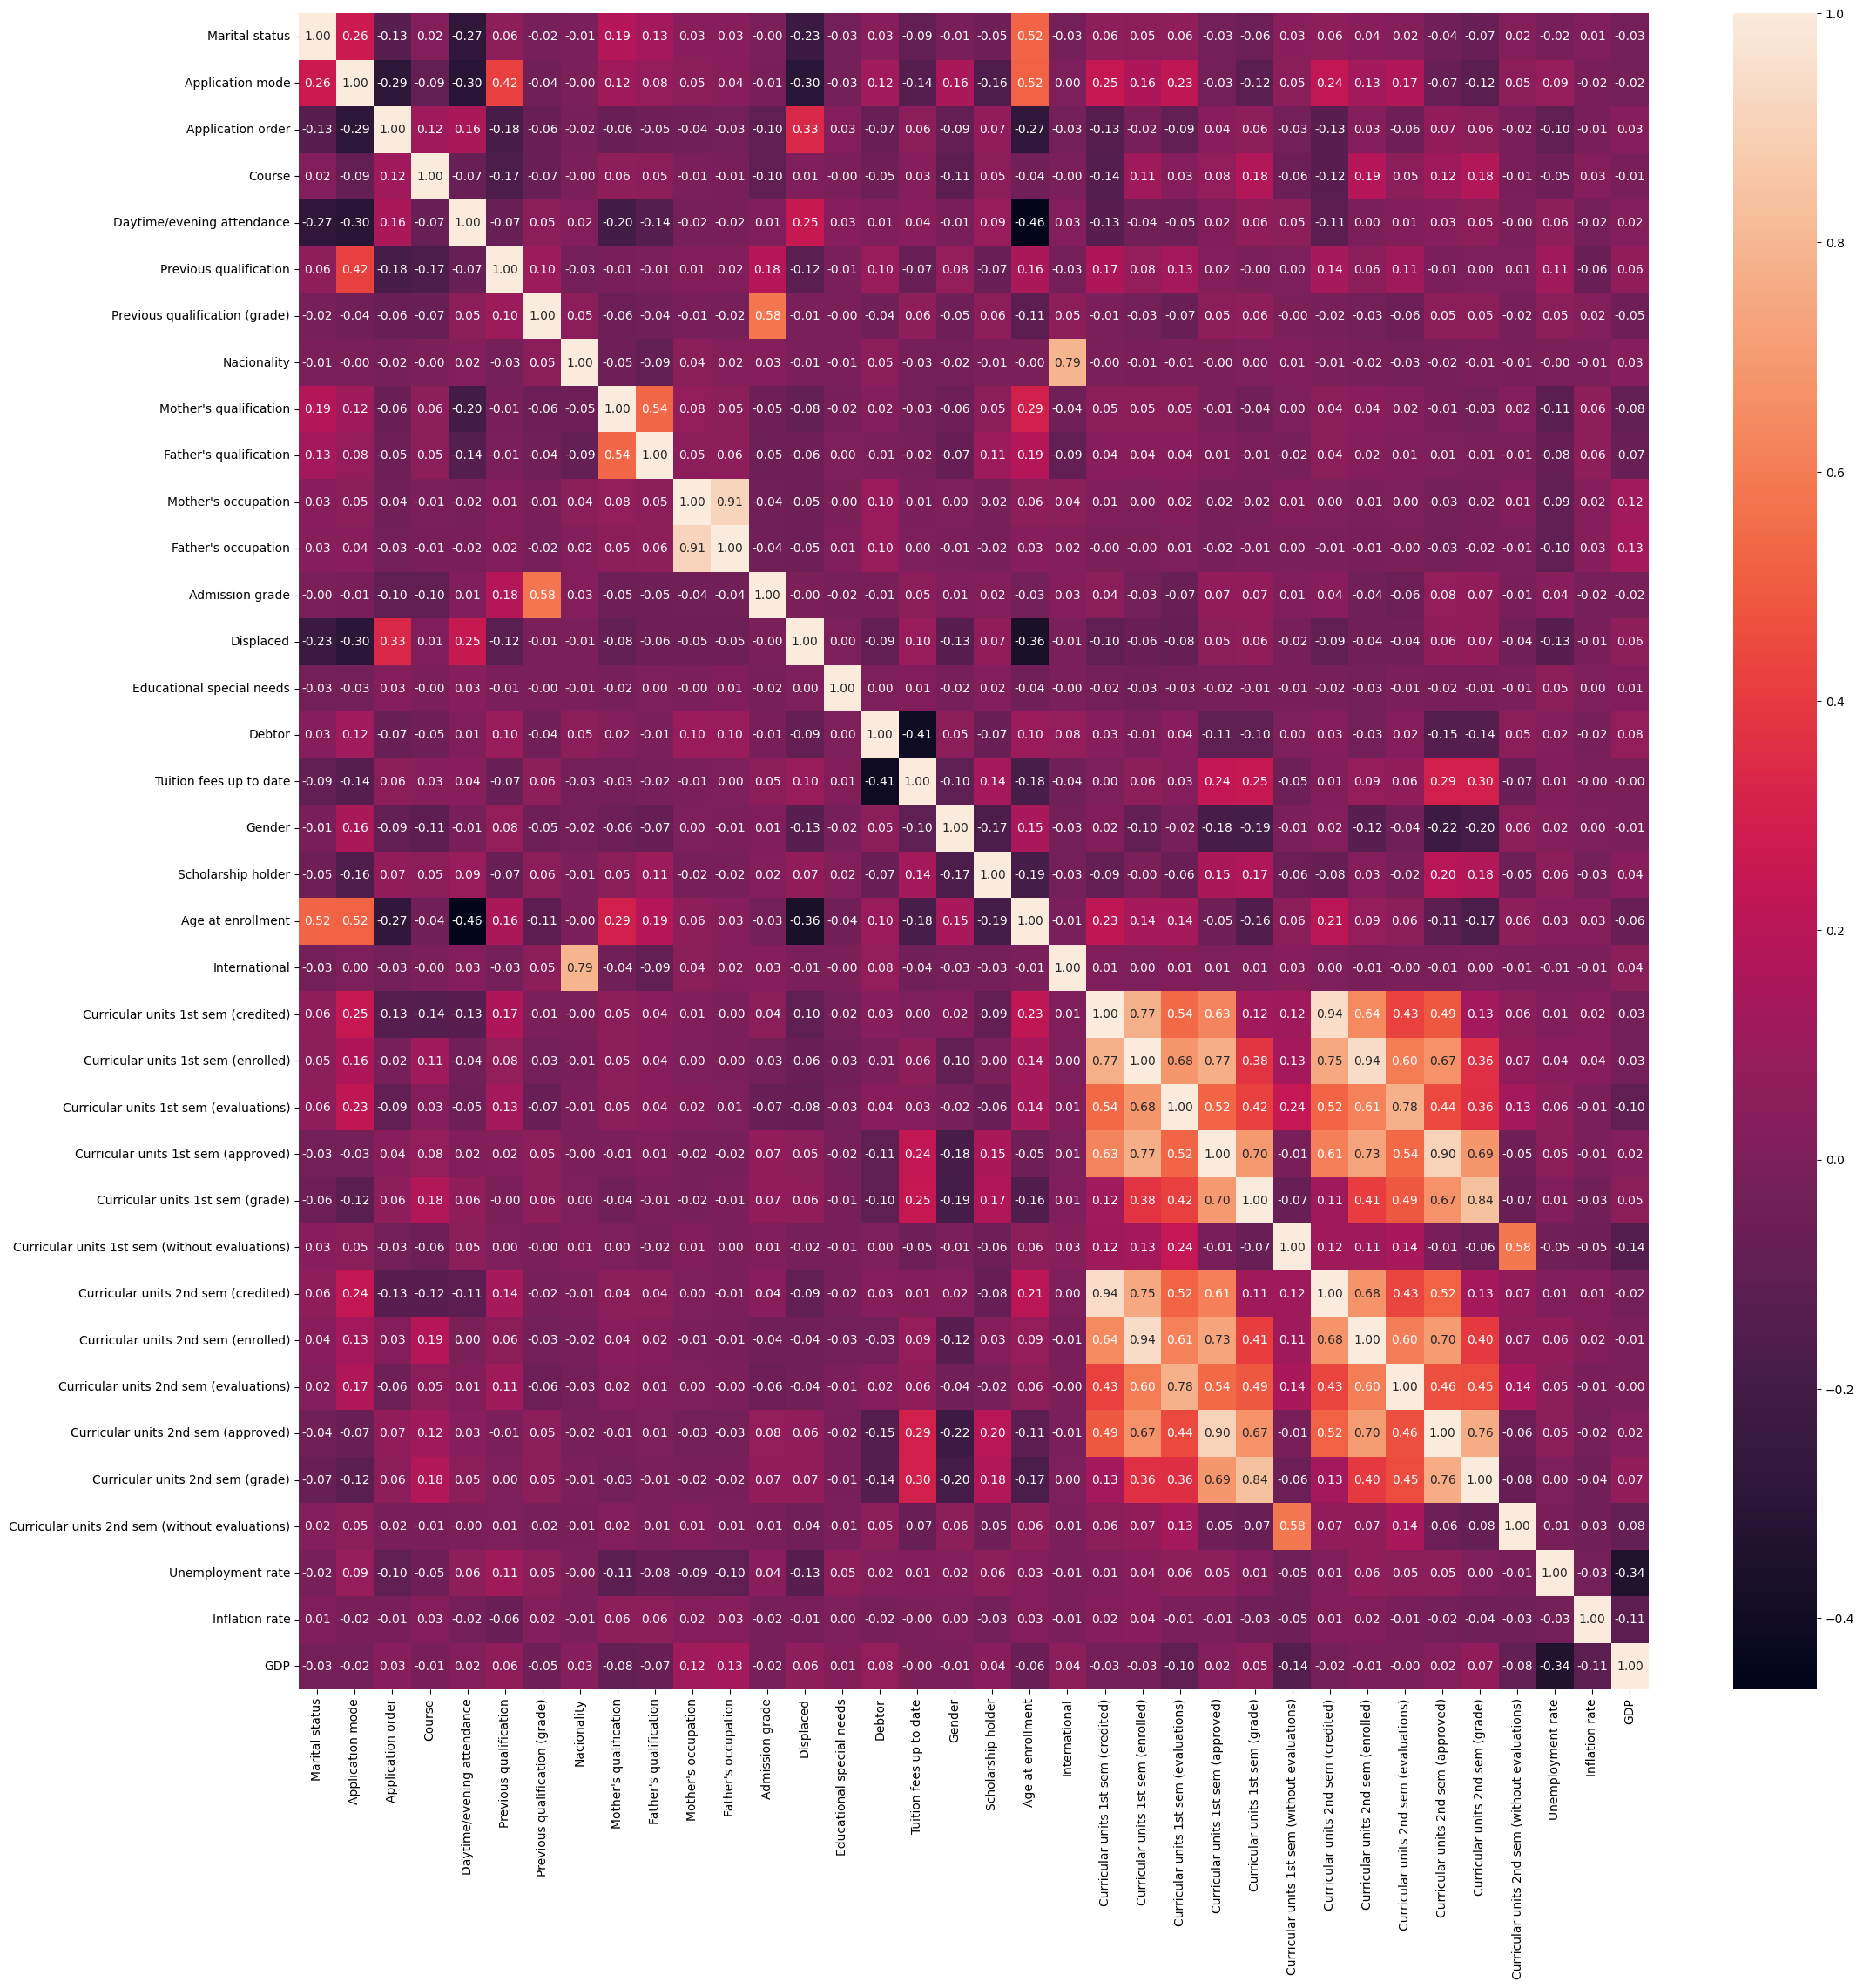

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

data.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

plt.figure(figsize=(25,25))
sns.heatmap(corr, xticklabels=data.columns[:-1], yticklabels=data.columns[:-1], annot=True, fmt='.2f')

Các cặp đa cộng tuyến gồm:
- Curricular units 1st sem (credited) và Curricular units 2nd sem (credited): 0.94
- Curricular units 1st sem (enrolled) và Curricular units 2nd sem (enrolled): 0.94
- Curricular units 1st sem (approved) và Curricular units 2nd sem (approved): 0.9
- Curricular units 1st sem (grade) và Curricular units 2nd sem (grade): 0.84

In [12]:
#data = data.drop(['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'], axis = 1)

### Normalizing

In [13]:
for col in data.columns:
    if data[col].dtype == np.float64:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

In [14]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,2,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,11,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,5,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,15,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,3,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1


### Splitting

In [15]:
X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy().reshape(-1,1)
print(X.shape, y.shape)

(4424, 36) (4424, 1)


In [16]:
split_index = int(0.8 * X.shape[0])
X_train, X_test = np.split(X, [split_index])
y_train, y_test = np.split(y, [split_index])

print('train:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

train: (3539, 36) (3539, 1)
test: (885, 36) (885, 1)


### Logistic Regression

In [17]:
class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def sigmoid(self, alpha: np.ndarray) -> np.ndarray:
        return 1/(1 + np.exp(-alpha))
    
    def lossfn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        esp = 1e-10
        return -(y * np.log(y_hat + esp) + (1 - y) * np.log(1 - y_hat + esp)).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0] # Số mẫu
        d = X.shape[1] # Số đặc trưng
        self.theta = np.zeros((d, 1))
        for e in range(self.epoch):
            #Vector gradient: 1/m X_T (X_theta - y)
            #Forward pass
            y_hat = self.predict(X)
            #Backward pass
            diff = y_hat - y
            gradient = (1 / n) * (X.T @ diff)
            self.theta -= self.lr*gradient

            #New evaluatation with new theta
            loss = self.lossfn(y, y_hat)
            acc = self.accuracy(y, y_hat)    

            self.losses.append(loss)
            self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        alpha = X @ self.theta
        y_hat = self.sigmoid(alpha)
        return y_hat
    
    #độ đo accuracy
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - y_hat)).mean()

In [18]:
logisticReg = LogisticRegression(10000, 0.001)

logisticReg.fit(X_train, y_train)

y_hat = logisticReg.predict(X_test)
print(y_hat)

accuracy = logisticReg.accuracy(y_test, y_hat)
print(accuracy)

[[9.07994643e-01]
 [8.35166444e-03]
 [1.94966571e-01]
 [3.11004245e-01]
 [5.08225440e-01]
 [4.56871039e-02]
 [8.44672368e-01]
 [9.52895284e-01]
 [7.39157353e-03]
 [1.45809278e-03]
 [7.58916462e-01]
 [3.22031291e-01]
 [3.48908822e-03]
 [1.63383054e-01]
 [8.70652384e-01]
 [6.51241641e-01]
 [8.97811917e-01]
 [4.50687462e-01]
 [1.45265359e-02]
 [8.92161254e-01]
 [6.13484608e-01]
 [1.22196135e-02]
 [8.23490579e-01]
 [6.87017920e-03]
 [4.67411770e-02]
 [6.57696320e-03]
 [4.33683247e-02]
 [9.94337633e-01]
 [8.39706024e-01]
 [3.45088296e-01]
 [1.30352196e-02]
 [3.24321215e-01]
 [8.48794130e-01]
 [7.77377191e-03]
 [1.21723616e-02]
 [8.68842828e-01]
 [8.48080129e-01]
 [5.28073367e-01]
 [1.27209274e-03]
 [1.57028776e-02]
 [9.02687449e-01]
 [7.30467235e-01]
 [8.36212484e-01]
 [1.65478618e-02]
 [5.25236761e-01]
 [8.97748687e-01]
 [1.79934950e-02]
 [2.79857015e-01]
 [9.74186302e-01]
 [5.18332451e-01]
 [1.29884073e-02]
 [5.50065065e-03]
 [8.07820632e-01]
 [1.22096734e-01]
 [7.31460537e-01]
 [2.937234

### Visualize loss function

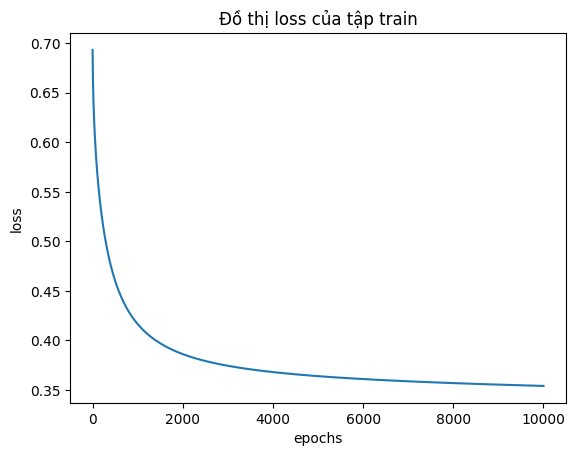

In [19]:
from matplotlib.pylab import plt

train_loss = logisticReg.losses

plt.plot(range(1, logisticReg.epoch + 1), logisticReg.losses, label = 'Training loss')
plt.title('Đồ thị loss của tập train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()